In [9]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

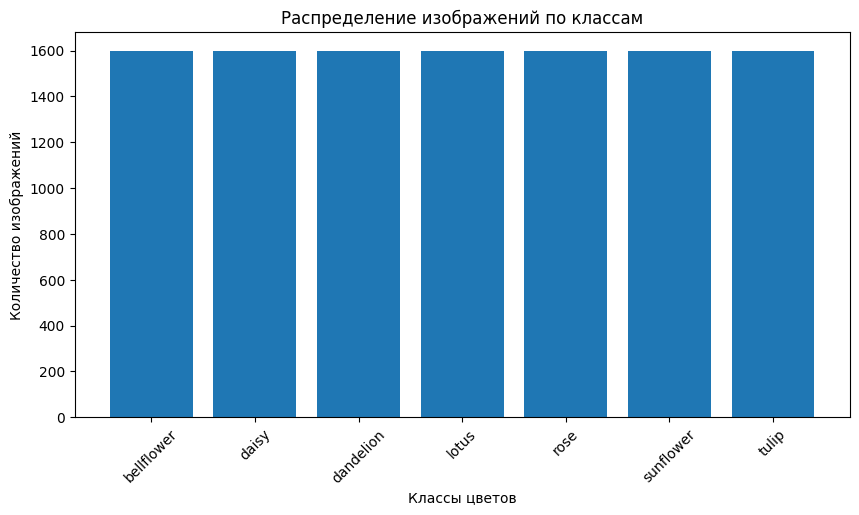

Средний размер изображения: 340.4585714285714x287.3542857142857
Минимальный размер: 159x129
Максимальный размер: 1300x1329


In [12]:
data_dir = 'flowers'
classes = ['bellflower', 'daisy', 'dandelion', 'lotus', 'rose', 'sunflower', 'tulip']

image_counts = {}
image_sizes = []

for flower_class in classes:
    class_dir = os.path.join(data_dir, flower_class)
    image_counts[flower_class] = len(os.listdir(class_dir))
    
    for img_name in os.listdir(class_dir)[:100]:
        img_path = os.path.join(class_dir, img_name)
        with Image.open(img_path) as img:
            image_sizes.append(img.size)

plt.figure(figsize=(10, 5))
plt.bar(image_counts.keys(), image_counts.values())
plt.title('Распределение изображений по классам')
plt.xlabel('Классы цветов')
plt.ylabel('Количество изображений')
plt.xticks(rotation=45)
plt.show()

widths, heights = zip(*image_sizes)
print(f"Средний размер изображения: {np.mean(widths)}x{np.mean(heights)}")
print(f"Минимальный размер: {np.min(widths)}x{np.min(heights)}")
print(f"Максимальный размер: {np.max(widths)}x{np.max(heights)}")

# Выводы:
# 1. Датесет сбалансирован - по 1600 изображений на каждый класс
# 2. Размеры изображений варьируются, потребуется стандартизация
# 3. Необходима аугментация данных для улучшения обобщающей способности модели

In [13]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install tenserflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 30
NUM_CLASSES = len(classes)

# Генераторы данных с аугментацией
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% данных для валидации
)

# Генератор для тренировочных данных
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Генератор для валидационных данных
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 8960 images belonging to 7 classes.
Found 2240 images belonging to 7 classes.
